# Load bile acid data

On Dec 17th I lost about six hours of work due to a Jupyter autosave issue. So, some of the data in [these slides](https://docs.google.com/presentation/d/1o1oZnMh_QMZhmZy7QMkd6V18J5iyAKZguDoxP49Xg80/edit#slide=id.gf4240ec9e_0_85) is going to need to be regenerated.  

In [1]:
!pwd

/Users/caporaso/code/crc-udca1


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

bile_acids_md = pd.read_csv('./data/ba-md.tsv', sep='\t', index_col=0)
plasma_bile_acids = pd.read_csv("./data/2015.12.03-plasma-bile.txt", sep='\t', index_col=0).fillna(0).round().T
fecal_water_bile_acids = pd.read_csv("./data/2015.12.03-fecal-water-bile.txt", sep='\t', index_col=0).fillna(0).round().T

In [3]:
bile_acids_md = bile_acids_md.sort(['parent-group', 'parent'], ascending=[1,0])

/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [4]:
bile_acids_md

,order,class,parent-group,type,parent
CA,primary,NaN,CA,parent,yes
GCA,primary,NaN,CA,glycine-conjugate,no
TCA,primary,NaN,CA,taurine-conjugate,no
CDCA,primary,NaN,CDCA,parent,yes
GCDCA,primary,NaN,CDCA,glycine-conjugate,no
TCDCA,primary,NaN,CDCA,taurine-conjugate,no
DCA,secondary,more cytotoxic,DCA,parent,yes
GDCA,secondary,more cytotoxic,DCA,glycine-conjugate,no
TDCA,secondary,more cytotoxic,DCA,taurine-conjugate,no
LCA,secondary,cytotoxic,LCA,parent,yes


In [5]:
n_bile_acids = len(bile_acids_md.index)
ba_corr_table = pd.DataFrame(np.ones(shape=(n_bile_acids, n_bile_acids)), 
                             index=bile_acids_md.index,
                             columns=bile_acids_md.index)
_pcorr = plasma_bile_acids.T.corr()
_fwcorr = fecal_water_bile_acids.T.corr()

for i in range(n_bile_acids):
    for j in range(i):
        i_ba = bile_acids_md.index[i] 
        j_ba = bile_acids_md.index[j]
        ba_corr_table[i_ba][j_ba] = _pcorr[i_ba][j_ba]
        ba_corr_table[j_ba][i_ba] = _fwcorr[i_ba][j_ba]

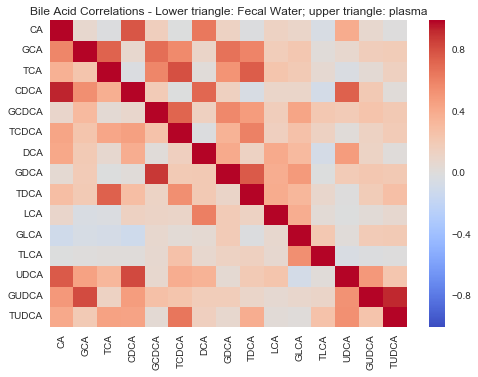

In [6]:
ax = sns.heatmap(ba_corr_table, cmap='coolwarm', center=0.0)
_ = ax.set_title('Bile Acid Correlations - Lower triangle: Fecal Water; upper triangle: plasma')


In [7]:
import scipy.stats
from crc import pairwise_corr_intersect

df = pairwise_corr_intersect(fecal_water_bile_acids.T, plasma_bile_acids.T)
df.to_csv('fecal-plasma-full.csv')
df

,r,p,q
GCDCA,0.201103,4.707943e-03,1.176986e-02
UDCA,0.525457,2.629354e-15,3.944030e-14
DCA,0.375907,5.651234e-08,4.238426e-07
TLCA,-0.055838,4.369554e-01,5.461943e-01
TCDCA,0.025341,7.244151e-01,8.358635e-01
LCA,0.238817,7.490565e-04,2.247169e-03
TDCA,-0.017645,8.060899e-01,8.636678e-01
CA,0.137666,5.433365e-02,9.055608e-02
GDCA,0.180566,1.132174e-02,2.426086e-02
GUDCA,0.334019,1.714219e-06,8.571097e-06


In [8]:
fecal_water_pg_bile_acids = pd.concat([fecal_water_bile_acids, bile_acids_md], axis=1).groupby("parent-group").sum()

In [9]:
plasma_pg_bile_acids = pd.concat([plasma_bile_acids, bile_acids_md], axis=1).groupby("parent-group").sum()

In [10]:
df = pairwise_corr_intersect(fecal_water_pg_bile_acids.T, plasma_pg_bile_acids.T)
df.to_csv('fecal-plasma-parent-group.csv')
df

,r,p,q
CA,0.127269,7.546895e-02,7.546895e-02
DCA,0.340714,1.026544e-06,2.566359e-06
CDCA,0.266508,1.595170e-04,2.658616e-04
UDCA,0.556106,2.638774e-17,1.319387e-16
LCA,0.200920,4.746637e-03,5.933297e-03


# Load sample metadata including phylum abundances

In [11]:
sample_md = pd.read_csv("./master-map.tsv", sep='\t', index_col="#SampleID").replace("no_data", np.nan).convert_objects(convert_numeric=True)
phyla_table = pd.read_csv("./data/combined-derep.rdp-tax-99.ms2.taxa-tables/combined-derep.rdp-tax-99.ms2_L2.txt", skiprows=1, sep='\t', header=0, index_col=0).T
sample_md = pd.concat([sample_md, phyla_table], axis=1)
# Collapse samples by patient for comparison to full bile acid tables
pt_md = sample_md.groupby("ptid").median()

/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [12]:
phyla_table

#OTU ID,Unclassified;Other,k__Archaea;Other,k__Archaea;p__Crenarchaeota,k__Archaea;p__Euryarchaeota,k__Bacteria;Other,k__Bacteria;p__Acidobacteria,k__Bacteria;p__Actinobacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Chlamydiae,k__Bacteria;p__Chlorobi,...,k__Bacteria;p__Lentisphaerae,k__Bacteria;p__NC10,k__Bacteria;p__Nitrospirae,k__Bacteria;p__Proteobacteria,k__Bacteria;p__SR1,k__Bacteria;p__Spirochaetes,k__Bacteria;p__Synergistetes,k__Bacteria;p__TM7,k__Bacteria;p__Tenericutes,k__Bacteria;p__Verrucomicrobia
udca.trial.3D3GJ5AN17Z83,9.0,0.0,0.0,0.0,111.0,0.0,103.0,31765.0,0.0,0.0,...,0.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,0.0,5.0
udca.trial.3BZF24H1SU9RY,14.0,0.0,0.0,0.0,106.0,0.0,220.0,536.0,0.0,0.0,...,0.0,0.0,0.0,167.0,0.0,0.0,0.0,0.0,0.0,2864.0
udca.trial.5YXEDF0OR8WWS,17.0,0.0,0.0,2.0,154.0,0.0,2555.0,4555.0,0.0,0.0,...,0.0,0.0,0.0,3488.0,0.0,0.0,0.0,0.0,0.0,1515.0
udca.trial.562LB46Q3NS54,24.0,0.0,0.0,1.0,210.0,0.0,1578.0,20027.0,0.0,0.0,...,0.0,0.0,0.0,757.0,0.0,0.0,0.0,0.0,0.0,7.0
udca.trial.4BT8BR002U43P,50.0,0.0,0.0,3.0,376.0,0.0,162.0,819.0,0.0,0.0,...,0.0,0.0,0.0,3135.0,0.0,0.0,0.0,0.0,1.0,10.0
udca.trial.8Q3644O2FDPV,14.0,0.0,0.0,0.0,183.0,0.0,3495.0,25400.0,0.0,0.0,...,16.0,0.0,0.0,1029.0,0.0,0.0,0.0,0.0,0.0,7.0
udca.trial.1OY031GAP9ZY3,13.0,0.0,0.0,0.0,148.0,0.0,113.0,279.0,0.0,0.0,...,0.0,0.0,0.0,430.0,0.0,0.0,0.0,0.0,1.0,8303.0
udca.trial.4K4AAPA3KWGZY,25.0,0.0,0.0,2.0,170.0,0.0,83.0,289.0,0.0,0.0,...,0.0,0.0,0.0,454.0,0.0,0.0,0.0,0.0,0.0,7422.0
udca.trial.6OAKVHE0JZVDL,16.0,0.0,0.0,0.0,151.0,0.0,3348.0,1966.0,0.0,0.0,...,0.0,0.0,0.0,257.0,0.0,0.0,0.0,0.0,1.0,5.0
udca.trial.1UA75JSQ7WLAR,14.0,0.0,0.0,0.0,112.0,0.0,2679.0,1044.0,0.0,0.0,...,0.0,0.0,0.0,819.0,0.0,0.0,0.0,0.0,1.0,5.0


In [13]:
print(np.array([sample_md.groupby("ptid").first()['treatmentgroup'][e] == 'placebo' for e in fecal_water_bile_acids.columns if e in pt_md.index]).sum())
print(np.array([sample_md.groupby("ptid").first()['treatmentgroup'][e] == 'UDCA' for e in fecal_water_bile_acids.columns if e in pt_md.index]).sum())


124
118


# Bile acid/microbiome correlations

Full bile acid profiles

In [14]:
from crc import pairwise_corr_all

df = pairwise_corr_all(fecal_water_bile_acids.T, pt_md[['Derep-PD', 'Derep-UnweightedUniFrac-PC1', 'Derep-WeightedUniFrac-PC1', "k__Bacteria;p__Bacteroidetes"]]).sort('q', ascending=True)
df.to_csv('fecal-water-microbiome-full.csv')
df

/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,r,p,q
"(UDCA, Derep-UnweightedUniFrac-PC1)",0.503134,8.346824e-17,5.008095e-15
"(TDCA, Derep-PD)",-0.418359,1.522761e-11,4.568283e-10
"(TCA, Derep-PD)",-0.401065,1.193052e-10,2.386105e-09
"(TDCA, Derep-UnweightedUniFrac-PC1)",0.384479,7.102858e-10,8.523430e-09
"(DCA, Derep-UnweightedUniFrac-PC1)",0.385451,6.382284e-10,8.523430e-09
"(UDCA, Derep-PD)",-0.382887,9.171713e-10,9.171713e-09
"(TCA, Derep-UnweightedUniFrac-PC1)",0.350262,2.467735e-08,2.115201e-07
"(CDCA, Derep-UnweightedUniFrac-PC1)",0.345559,3.892676e-08,2.919507e-07
"(TUDCA, Derep-UnweightedUniFrac-PC1)",0.339484,6.936288e-08,4.624192e-07
"(GUDCA, Derep-UnweightedUniFrac-PC1)",0.323904,2.886806e-07,1.732084e-06


In [15]:
df = pairwise_corr_all(plasma_bile_acids.T, pt_md[['Derep-PD', 'Derep-UnweightedUniFrac-PC1', 'Derep-WeightedUniFrac-PC1', "k__Bacteria;p__Bacteroidetes"]]).sort('q', ascending=True)
df.to_csv('plasma-microbiome-full.csv')
df

/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,r,p,q
"(UDCA, Derep-UnweightedUniFrac-PC1)",0.413597,3.710140e-14,1.113042e-12
"(GUDCA, Derep-UnweightedUniFrac-PC1)",0.415181,2.900485e-14,1.113042e-12
"(GUDCA, Derep-PD)",-0.298137,1.014917e-07,2.029835e-06
"(UDCA, Derep-PD)",-0.288112,2.793613e-07,3.352336e-06
"(TUDCA, Derep-UnweightedUniFrac-PC1)",0.289761,2.265950e-07,3.352336e-06
"(UDCA, Derep-WeightedUniFrac-PC1)",0.207378,2.477457e-04,2.477457e-03
"(TUDCA, Derep-PD)",-0.204354,3.132785e-04,2.685244e-03
"(GUDCA, Derep-WeightedUniFrac-PC1)",0.176734,1.848131e-03,1.386098e-02
"(CDCA, Derep-WeightedUniFrac-PC1)",0.168747,2.970339e-03,1.620185e-02
"(LCA, Derep-PD)",0.170546,2.717412e-03,1.620185e-02


Bile acid profiles collapsed by parent group (so each included parent bile acid and glycine and taurine conjugates)

In [16]:
df = pairwise_corr_all(fecal_water_pg_bile_acids.T, pt_md[['Derep-PD', 'Derep-UnweightedUniFrac-PC1', 'Derep-WeightedUniFrac-PC1', "k__Bacteria;p__Bacteroidetes"]]).sort('q', ascending=True)
df.to_csv('fecal-water-microbiome-parent-group.csv')
df

/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,r,p,q
"(UDCA, Derep-UnweightedUniFrac-PC1)",0.501014,1.176004e-16,2.352007e-15
"(DCA, Derep-UnweightedUniFrac-PC1)",0.386231,5.856208e-10,5.856208e-09
"(UDCA, Derep-PD)",-0.381972,1.013091e-09,6.753941e-09
"(CDCA, Derep-UnweightedUniFrac-PC1)",0.344787,4.192013e-08,2.096007e-07
"(CDCA, Derep-PD)",-0.326781,2.366091e-07,9.464364e-07
"(CA, Derep-PD)",-0.308142,1.188813e-06,3.962709e-06
"(CA, Derep-UnweightedUniFrac-PC1)",0.296417,2.960247e-06,8.457849e-06
"(DCA, Derep-PD)",-0.216677,7.453526e-04,1.863381e-03
"(UDCA, k__Bacteria;p__Bacteroidetes)",-0.183275,4.228484e-03,9.396632e-03
"(LCA, Derep-UnweightedUniFrac-PC1)",0.148784,2.112381e-02,4.224762e-02


In [17]:
pairwise_corr_all(plasma_pg_bile_acids.T, pt_md[['Derep-PD', 'Derep-UnweightedUniFrac-PC1', 'Derep-WeightedUniFrac-PC1', "k__Bacteria;p__Bacteroidetes"]]).sort('q', ascending=True)
df.to_csv('plasma-microbiome-parent-group.csv')
df

/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,r,p,q
"(UDCA, Derep-UnweightedUniFrac-PC1)",0.501014,1.176004e-16,2.352007e-15
"(DCA, Derep-UnweightedUniFrac-PC1)",0.386231,5.856208e-10,5.856208e-09
"(UDCA, Derep-PD)",-0.381972,1.013091e-09,6.753941e-09
"(CDCA, Derep-UnweightedUniFrac-PC1)",0.344787,4.192013e-08,2.096007e-07
"(CDCA, Derep-PD)",-0.326781,2.366091e-07,9.464364e-07
"(CA, Derep-PD)",-0.308142,1.188813e-06,3.962709e-06
"(CA, Derep-UnweightedUniFrac-PC1)",0.296417,2.960247e-06,8.457849e-06
"(DCA, Derep-PD)",-0.216677,7.453526e-04,1.863381e-03
"(UDCA, k__Bacteria;p__Bacteroidetes)",-0.183275,4.228484e-03,9.396632e-03
"(LCA, Derep-UnweightedUniFrac-PC1)",0.148784,2.112381e-02,4.224762e-02


## Bile acid/demographic correlations

In [16]:
fecal_water_bile_acids.T.corrwith(pt_md['bmi'])

UDCA    -0.005962
LCA      0.044389
CDCA     0.036785
DCA      0.165866
CA       0.064931
GUDCA    0.018778
TUDCA   -0.014249
TLCA    -0.100667
GLCA     0.063095
TCDCA   -0.039364
GCDCA   -0.013702
TDCA    -0.004316
GDCA     0.020738
TCA      0.018153
GCA      0.039876
dtype: float64

In [17]:
fecal_water_pg_bile_acids.T.corrwith(pt_md['bmi'])

parent-group
CA      0.064679
CDCA    0.036663
DCA     0.165674
LCA     0.044379
UDCA   -0.005962
dtype: float64

In [18]:
fecal_water_bile_acids.T.corrwith(pt_md['age'])

UDCA    -0.021392
LCA      0.054787
CDCA    -0.094371
DCA     -0.049648
CA      -0.112971
GUDCA   -0.012830
TUDCA    0.021728
TLCA     0.072214
GLCA     0.013594
TCDCA   -0.026856
GCDCA    0.005530
TDCA    -0.065808
GDCA    -0.024899
TCA     -0.035268
GCA     -0.053619
dtype: float64

In [19]:
fecal_water_pg_bile_acids.T.corrwith(pt_md['age'])

parent-group
CA     -0.112582
CDCA   -0.094304
DCA    -0.049888
LCA     0.054844
UDCA   -0.021233
dtype: float64

## Bile acid/microbiome/demographic associations

In [20]:
import scipy.stats
from itertools import product

def group_category_u(ptid_md, ba_profile, group, category, group_values):
    df = pd.concat([ptid_md, ba_profile.T], axis=1, join='inner')
    if len(group_values) != 2:
        raise ValueError("Can only support two categories.")
    grouped = df.groupby(group)
    group0_values = grouped.get_group(group_values[0])[category]
    group1_values = grouped.get_group(group_values[1])[category]
    return scipy.stats.mannwhitneyu(group0_values, group1_values)

In [21]:
groups = (['male'], [0, 1])
categories = ['bmi', 'Derep-PD', 'Derep-UnweightedUniFrac-PC1', 'Derep-WeightedUniFrac-PC1', 'k__Bacteria;p__Bacteroidetes']

#for e in product(groups, ):

In [22]:
group_category_u(pt_md, fecal_water_bile_acids, 'male', 'bmi', [0, 1])

MannwhitneyuResult(statistic=3868.0, pvalue=0.0015951752595092861)

In [23]:
group_category_u(pt_md, fecal_water_bile_acids, 'male', 'Derep-PD', [0, 1])

MannwhitneyuResult(statistic=5159.0, pvalue=0.7041884415031735)

In [24]:
group_category_u(pt_md, fecal_water_bile_acids, 'male', 'Derep-UnweightedUniFrac-PC1', [0, 1])

MannwhitneyuResult(statistic=6400.0, pvalue=0.022154076807547645)

In [25]:
group_category_u(pt_md, fecal_water_bile_acids, 'male', 'Derep-WeightedUniFrac-PC1', [0, 1])

MannwhitneyuResult(statistic=4206.0, pvalue=0.015111754315008811)

In [26]:
group_category_u(pt_md, fecal_water_bile_acids, 'male', 'k__Bacteria;p__Bacteroidetes', [0, 1])

MannwhitneyuResult(statistic=5051.0, pvalue=0.54054202159985265)

# Beta diversity

In [27]:
from skbio.diversity import beta_diversity
from sklearn.metrics import pairwise_distances
from functools import partial
from skbio.stats.distance import mantel

pairwise_func = partial(pairwise_distances, n_jobs=10)

In [28]:
plasma_bile_acids_dm = beta_diversity("braycurtis", np.asarray(plasma_bile_acids.T.round(), dtype=np.int), 
                                           ids=plasma_bile_acids.columns, pairwise_func=pairwise_func)
fecal_water_bile_acids_dm = beta_diversity("braycurtis", np.asarray(fecal_water_bile_acids.T.round(), dtype=np.int), 
                                           ids=fecal_water_bile_acids.columns, pairwise_func=pairwise_func)
r, p_value, n = mantel(fecal_water_bile_acids_dm, plasma_bile_acids_dm, strict=False)
print(r, p_value, n)

0.0793916880438 0.012 196


In [29]:
plasma_pg_bile_acids_dm = beta_diversity("braycurtis", np.asarray(plasma_pg_bile_acids.T.round(), dtype=np.int), 
                                           ids=plasma_pg_bile_acids.columns, pairwise_func=pairwise_func)
fecal_pg_water_bile_acids_dm = beta_diversity("braycurtis", np.asarray(fecal_water_pg_bile_acids.T.round(), dtype=np.int), 
                                           ids=fecal_water_pg_bile_acids.columns, pairwise_func=pairwise_func)
r, p_value, n = mantel(plasma_pg_bile_acids_dm, fecal_pg_water_bile_acids_dm, strict=False)
print(r, p_value, n)

0.0617627351959 0.043 196


```shell
filter_samples_from_otu_table.py -i combined-derep.rdp-tax-99.ms2.biom -o combined-derep.rdp-tax-99.ms2.biom.pre -m master-map.tsv --valid_states="visit:pre"

collapse_samples.py -b combined-derep.rdp-tax-99.ms2.biom.pre --output_biom_fp combined-derep.rdp-tax-99.ms2.pre-ptid.biom -m master-map.tsv --output_mapping_fp map.pre-ptid.tsv --collapse_fields ptid --collapse_mode median

biom convert -i combined-derep.rdp-tax-99.ms2.pre-ptid.biom -o combined-derep.rdp-tax-99.ms2.pre-ptid.tsv --to-tsv
```

```shell
biom convert -i combined-derep.rdp-tax-99.ms2.biom -o combined-derep.rdp-tax-99.ms2.tsv --to-tsv
```

Midpoint root the tree with ete3, since the scikit-bio midpoint rooting is broken (https://github.com/biocore/scikit-bio/pull/1208).

```python
from ete3 import Tree
t = Tree("combined-ssu-align/combined-ssu-align.bacteria.mask.tre", format=1)
t.set_outgroup(t.get_midpoint_outgroup())
t.write(outfile="combined-ssu-align/combined-ssu-align.bacteria.mask.mid-rooted.tre", format=1)
```

In [30]:
# adapted from q2d2...
from skbio.stats import subsample_counts
from skbio.stats.distance import MissingIDError
def rarify(biom, even_sampling_depth):
    data = []
    sample_ids = []
    for e in biom.index:
        count_vector = biom.loc[e]
        if count_vector.sum() < even_sampling_depth:
            continue
        else:
            sample_ids.append(e)
            data.append(subsample_counts(count_vector.astype(int), even_sampling_depth))
    result = pd.DataFrame(np.asarray(data), index=sample_ids, columns=biom.columns)
    # drop OTUs with zero count and return the result
    return result.loc[:,[result[e].sum()>0 for e in result.columns]]

def intersect_tree_biom(tree, biom):
    tip_names = set([e.name for e in tree.tips()])
    otu_ids = set(biom.columns)
    common_ids = tip_names & otu_ids
    tree = tree.shear(common_ids)
    biom = biom[list(common_ids)]
    return tree, biom

def extract_distance_distribution(dm, pairs):
    result = []
    for p in pairs:
        try:
            result.append(dm[p])
        except MissingIDError:
            pass
    return result
    
from crc import get_group_pairs

In [31]:
from skbio import TreeNode
skbio_rooted_tree = TreeNode.read("combined-ssu-align/combined-ssu-align.bacteria.mask.mid-rooted.tre")

In [32]:
skbio_unrooted_tree = TreeNode.read("combined-ssu-align/combined-ssu-align.bacteria.mask.tre")

In [33]:
derep_otus_ptid = pd.read_csv('combined-derep.rdp-tax-99.ms2.pre-ptid.tsv', sep='\t', skiprows=1, index_col=0).T

In [34]:
skbio_rooted_tree, derep_otus_ptid = intersect_tree_biom(skbio_rooted_tree, derep_otus_ptid)

In [35]:
derep_otus_ptid_even = rarify(derep_otus_ptid, 5000)

KeyboardInterrupt: 

In [ ]:
print(derep_otus_ptid_even.shape)
print(derep_otus_ptid.shape)
print(repr(skbio_rooted_tree))

In [ ]:
derep_otus_ptid_bray_curtis = beta_diversity(metric="braycurtis", counts=np.asarray(derep_otus_ptid_even, dtype=np.int),
                               ids=derep_otus_ptid_even.index, pairwise_func=pairwise_func)

In [ ]:
print(mantel(derep_otus_ptid_bray_curtis, fecal_water_bile_acids_dm, strict=False))
print(mantel(derep_otus_ptid_bray_curtis, plasma_bile_acids_dm, strict=False))

In [ ]:
# this took about 30 mins
derep_otus_ptid_unweighted_unifrac = beta_diversity(metric="unweighted_unifrac", counts=np.asarray(derep_otus_ptid_even, dtype=np.int),
                               ids=derep_otus_ptid_even.index, pairwise_func=pairwise_func, tree=skbio_rooted_tree,
                               otu_ids=derep_otus_ptid_even.columns)

In [ ]:
derep_otus_ptid_unweighted_unifrac.write('combined-derep.rdp-tax-99.ms2.pre-ptid.uu-dm.txt')

In [ ]:
print(mantel(derep_otus_ptid_unweighted_unifrac, derep_otus_ptid_bray_curtis, strict=False))
print(mantel(derep_otus_ptid_unweighted_unifrac, fecal_water_bile_acids_dm, strict=False))
print(mantel(derep_otus_ptid_unweighted_unifrac, plasma_bile_acids_dm, strict=False))

# Distance distribution comparisons

In [37]:
derep_otus = pd.read_csv('combined-derep.rdp-tax-99.ms2.tsv', sep='\t', skiprows=1, index_col=0).T

In [94]:
skbio_rooted_tree, derep_otus = intersect_tree_biom(skbio_rooted_tree, derep_otus)
derep_otus_even = rarify(derep_otus, 5000)

In [39]:
derep_otus_bray_curtis = beta_diversity(metric="braycurtis", counts=np.asarray(derep_otus_even, dtype=np.int),
                                        ids=derep_otus_even.index, pairwise_func=pairwise_func)

In [91]:
import skbio.stats.ordination
derep_otus_pcoa = skbio.stats.ordination.pcoa(derep_otus_bray_curtis)

/home/gregcaporaso/.conda/envs/data-analysis/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.2224680416543777 and the largest is 19.707923004377832.
  RuntimeWarning


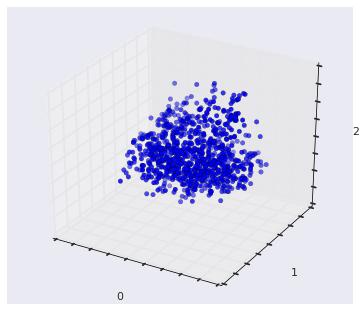

In [92]:
derep_otus_pcoa

In [64]:
print("Female, UDCA", np.array([sample_md['male'][e[0]] == 0.0 for e in udca_pairs]).sum())
print("Male, UDCA", np.array([sample_md['male'][e[0]] == 1.0 for e in udca_pairs]).sum())
print("Female, Placebo", np.array([sample_md['male'][e[0]] == 0.0 for e in placebo_pairs]).sum())
print("Male, Placebo", np.array([sample_md['male'][e[0]] == 1.0 for e in placebo_pairs]).sum())


Female, UDCA 54
Male, UDCA 173
Female, Placebo 79
Male, Placebo 145


In [95]:
derep_otus_unweighted_unifrac = beta_diversity(metric="unweighted_unifrac", counts=np.asarray(derep_otus_even, dtype=np.int),
                               ids=derep_otus_even.index, pairwise_func=pairwise_func, tree=skbio_rooted_tree,
                               otu_ids=derep_otus_even.columns)

/home/gregcaporaso/.conda/envs/data-analysis/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/gregcaporaso/.conda/envs/data-analysis/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/gregcaporaso/.conda/envs/data-analysis/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensio

In [96]:
derep_otus_unweighted_unifrac.write('derep_even5000_unweighted_unifrac_dm.txt')

'derep_even5000_unweighted_unifrac_dm.txt'

U=15523.00, p=0.829


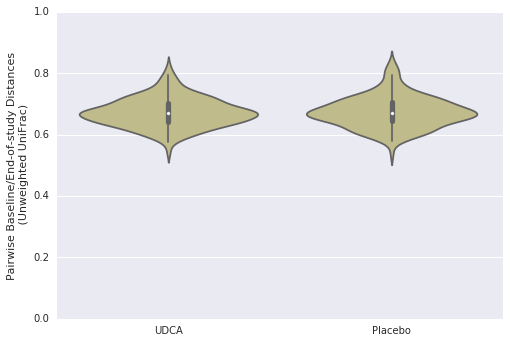

In [110]:
udca_pairs = get_group_pairs(sample_md, 'UDCA')
udca_pairwise_distances = extract_distance_distribution(derep_otus_unweighted_unifrac, udca_pairs)
placebo_pairs = get_group_pairs(sample_md, 'placebo')
placebo_pairwise_distances = extract_distance_distribution(derep_otus_unweighted_unifrac, placebo_pairs)
u, p = scipy.stats.mannwhitneyu(udca_pairwise_distances, placebo_pairwise_distances)
ax = sns.violinplot(data=[udca_pairwise_distances, placebo_pairwise_distances], palette=['#C9C282', '#C9C282'])
ax.set_ylim(0,1)
ax.set_xticklabels(['UDCA', 'Placebo'])
ax.set_ylabel("Pairwise Baseline/End-of-study Distances\n (Unweighted UniFrac)")
print('U=%1.2f, p=%1.3f' % (u, p))
ax.get_figure().savefig('derep_even5000_unweighted_unifrac_violin.pdf')

In [111]:
from IPython.display import FileLink
FileLink('derep_even5000_unweighted_unifrac_violin.pdf')

/home/gregcaporaso/data-analysis/2015-nacp-raw-data/derep_even5000_unweighted_unifrac_violin.pdf

# Alpha diversity

In [ ]:
from skbio.diversity import alpha_diversity
derep_otus_ptid_faith_pd = alpha_diversity(metric="faith_pd", counts=np.asarray(derep_otus_ptid_even, dtype=np.int),
                               ids=derep_otus_ptid_even.index, tree=skbio_rooted_tree,
                               otu_ids=derep_otus_ptid_even.columns)

In [ ]:
derep_otus_faith_pd = alpha_diversity(metric="faith_pd", counts=np.asarray(derep_otus_even, dtype=np.int),
                               ids=derep_otus_even.index, tree=skbio_rooted_tree,
                               otu_ids=derep_otus_even.columns)

In [ ]:
derep_otus_faith_pd["udca.trial.265DU6B42E0FG"]

# Taxa/PCoA correlations

In [ ]:
sample_md["k__Bacteria;p__Bacteroidetes"].corr(sample_md["Derep-WeightedUniFrac-PC1"])